En nuestro paso por las matemáticas aplicadas, en particular en el estudio de sistemas complejos, intepretar, limpiar, transformar y modelar datos reales es una de las tareas más importantes. Las observaciones/mediciones de un fénomenos nos pueden ayudar a validar nuestro modelo, encontrar nuestros los parámetros o darnos cuenta que no vamos por el camino adecuado. Para esto es fundamental el uso de algún lenguaje de programación, sobre todo, si se van a manipular cantidades grandes de datos. 

En este caso nos vamos a acercar, por necesidad, al _aprendizaje máquina supervisado_ (_supervised machine learning_). Notemos que este campo también es conocido como modelado estadístico. Pero confieso que quería generar fomo. Pero sí, en un sentido, es lo mismo.

NOTAS: 
1. Voy a continuar con el lenguaje de aprendizaje máquina durante esta serie de notebooks,

2. Estas notas están basadas e inspiradas por el libro _Pattern Recognition and Machine Learning_ de Christopher Bishop, no son una traducción pero ahí podrán encontrar algunos tópicos más desarrollados, aunque aquí encontrarán ejemplos y metodologías que no son exploradas en ese libro. 

Iniciar esta sección es un poco difícil. Encontrar patrones en los datos es una tarea diaria de los seres vivos, las bacterias buscan moverse a regiones de menor concentración de anitbiótico, las persona tomamos el paraguas antes de salir si el día está nublado, los perros de pradera avisan al resto del grupo que hay un posible depredador y todos huyen a esconderse en la madrigera. Aparentemente, buscar patrones y hacer inferencia a partir de ellos es una tarea diaria, necesaria y, aunque no lo parezca, difícil. 

No es un secreto que uno de los patrones más documentados, desde una perspectiva histórica, es el movimiento de bóveda celeste. Se ha usado por prácticamente todas las sociedades humanas para poder predecir los momentos más adecuados para cosecha y siembra, para predecir el cambio del clima y hasta para marcar los rituales sociales. Pero no fue sino hasta el siglo 16 que las observaciones de Tycho Brahe habilitaron a Johannes Kepler por un lado, invalidar el modelo Copernicano y por el otro, encontrar los parámetros para un nuevo modelo, el de órbitas elípticas -el parámetro es la excentricidad-. Hay que tomar en cuenta que este proceso le tomó a Kepler cerca de 20 años. 

La realidad es que la historia muy interesante, repasando las complicaciones:
1. Las observaciones de Brahe fueron simplemente usando la vista, los telescopios se inventaron después de su muerte,

2. Todos los cálculos debían de hacerse a mano y manejar los decimales era difícil, regularmente se usaban aproximaciones y regularmete se expresaba todo en términos de divisiones sexagesimales,

3.  Las matemáticas aún no eran abstractas, no teníamos una ecuación para describirn una elipse. Kepler sabía que era una elipse pero no pudo describir la región matemática. 

La fortuna es que ahora tenemos un lenguaje matemático abstracto y computadoras.

Como introducción a los modelos de regresión, voy a comenzar con un ejemplo usando datos sintéticos, luego vamos a usar un conjunto de datos de diabetes (ajuste multi-lineal) y vamos a cerrar con un ajuste no-líneal.

# Mínimos cuadrados y ajuste de curvas polinómicas

La idea es sencilla, vamos a partir de que hacemos $N$ observaciones de un fenómeno en tiempos $t_{i}$, de tal manera que tenemos una secuencia ordenada de la forma $\mathbf{t} = (t_1,t_2,\dots,t_{N})^T$ y las observaciones correspondientes son $\mathbf{y} = (y_{1},y_{2},\dots,y_{N})$. Un ejemplo de esto puede ser medir la temperatura en el busto de Darwin cada día durante un año a la misma hora. En este caso, la unidad de tiempo es cada día del año y la cantidad observada correspondiente es la temperatura. 

La idea detrás de todo esto es que vamos a suponer que existe una función $\hat{y}(\cdot)$ tal que si le das un punto $t_{i}$ entonces $\hat{y}(t_{i})\mapsto y_{i} + \epsilon_{i}$ donde a $\epsilon_{i}$ le llamaremos _error_. Notemos que uno de los supuestos más fuertes es que la función $\hat{y}$ exista, pero esto no necesariamente siempre pasa. 

Para poder explorar más la relación entre $\mathbf{y}$, $\mathbf{t}$ y $\hat{y}$, y hacerlo menos abstracto, vamos a comenzar con un ejemplo. Para este ejemplo vamos a crear un conjunto de observaciones sintéticas. Supongamos que hacemosn 30 mediciones equidistantes entre 0 y 1 unidades de tiempo. Como vamos a crear los datos de manera artifical vamos a crear una $f(t) = \cos(2\pi t)$

A continuación se muestra el código de cómo la podemos generar:

In [735]:
import matplotlib.pyplot as plt # Aquí viven las funciones para graficar
import numpy as np # De aquí obtenemos las funciones matemáticas

np.random.seed(25) # Esto asegura que los resultados sean replicables

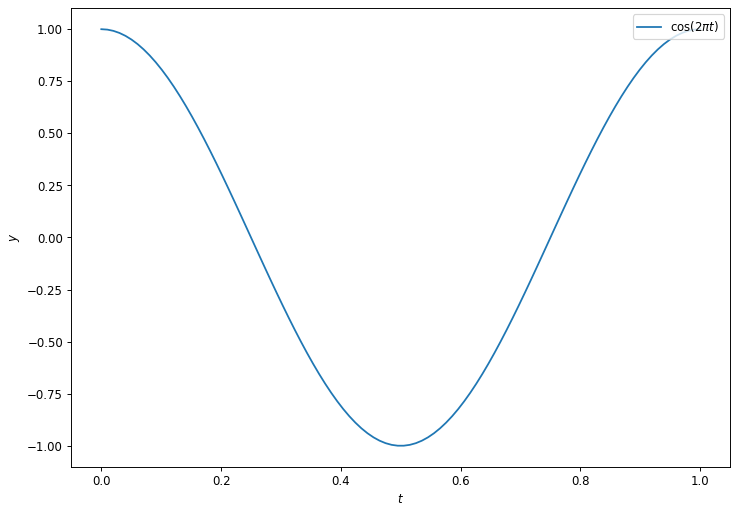

In [736]:
# f = lambda t : np.sin(2*np.pi*t) *np.cos(2*np.pi*t) * np.exp(-2*t/np.pi)
f = lambda t : np.cos(2*np.pi*t) # declaramos nuestra función cos(2 pi t)

t = np.linspace(0,1,100) # creamos 100 puntos equidistantes en el intervalo cerrado [0, 1]
y = f(t) # Evaluamos los puntos en nuestra función

fig,ax = plt.subplots(1,1,figsize=(10,7),dpi=85)
ax.plot(t,y,label=r"$\cos(2\pi t)$")
ax.set_ylabel(r"$y$")
ax.set_xlabel(r"$t$")
ax.legend(loc='upper right')
plt.show()

Notemos que en este caso, ya sabemos _a priori_ que $\hat{y} = f(t) = \cos(2\pi t)$ sin embargo vamos a suponer que no y vamos a ver tanto nos podemos acercar a esta función sin conocimiento previo. 

Otra cosa que vamos a hacer es _agregar ruido_ a los datos ya que toda máquina que ejecute alguna medición siempre incluye un error/ruido. Esto lo vamos a hacer sumando en cada punto $y_{i}$ un pequeño empujón $\epsilon$ tal que $\epsilon \sim \mathcal{N}(0,0.3^2)$. En palabras: el empujón que le vamos a dar el valor $y_i$ va a estar distribuido de manera normal al rededor del 0 con una desviación estándar de $0.3$.

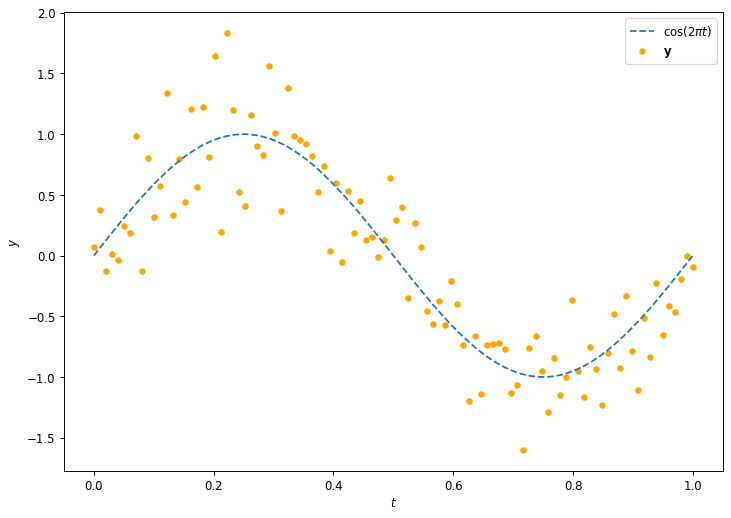

In [737]:
f = lambda t : np.sin(2*np.pi*t) # declaramos nuestra función cos(2 pi t)

t = np.linspace(0,1,100) # creamos 100 puntos equidistantes en el intervalo cerrado [0, 1]
y = f(t) # Evaluamos los puntos en nuestra función

y_noisy = np.asarray([y_i + np.random.normal(scale=0.3) for y_i in y])

fig,ax = plt.subplots(1,1,figsize=(10,7),dpi=85)
ax.plot(t,y,label=r"$\cos(2\pi t)$",ls='--')
ax.scatter(t,y_noisy,label=r"$\mathbf{y}$",s=20,c='orange')
ax.set_ylabel(r"$y$")
ax.set_xlabel(r"$t$")
ax.legend(loc='upper right')
plt.show()

En la práctica nuestro trabajo es determinar la función $\hat{y}$ y nuestro insumo serán datos que están _corruptos_ con ruido. Además, regularmente no tenemos tantos datos. Por própositos ilustrativos cree 100 puntos, pero en al principio prometimos 30 observaciones.

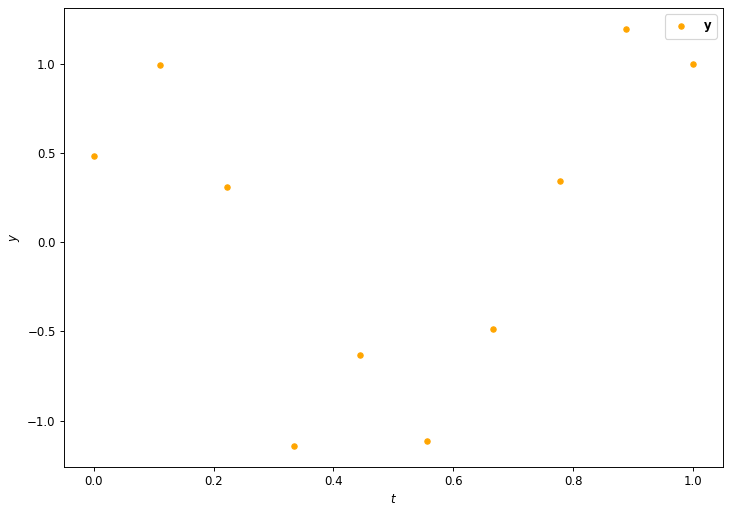

In [738]:
f = lambda t : np.cos(2*np.pi*t) # declaramos nuestra función cos(2 pi t)

t = np.linspace(0,1,10) # creamos 10 puntos equidistantes en el intervalo cerrado [0, 1]
y = f(t) # Evaluamos los puntos en nuestra función
y_noisy = np.asarray([y_i +np.random.normal(scale=0.3) for y_i in y])

fig,ax = plt.subplots(1,1,figsize=(10,7),dpi=85)
ax.scatter(t,y_noisy,label=r"$\mathbf{y}$",s=20,c='orange')
ax.set_ylabel(r"$y$")
ax.set_xlabel(r"$t$")
ax.legend(loc='upper right')
plt.show()

En la práctica hacemos adivinazas sobre la naturaleza de la función $\hat{y}$. La ventaja es que existen _aproximadores universales_ o _bases_ -sí, en el mismo sentido que en álgebra lineal-. Uno de estos aproximadores -aunque solamete es local- es un polinomio (expansión de Taylor). Localmente podemos aproximar cualquier función usando un polinomio de grado $K$, es básicamente la expansión de Taylor. Lo único que tenemos que encontrar los coeficientes adecuados. Lo que propongo con esto es que $\hat{y}$ luzca como:
$$
\hat{y}(t,\mathbf{w}) = w_{0} + w_{1} t + w_{2} t^{2} + w_{3} t^{3} + w_{K} t^{K} = \displaystyle\sum_{j=0}^{K} w_{j} t^{j} 
$$
Notemos que en un polinomio de grado $K$, el vector $\mathbf{w}$ de coeficientes representa nuestros parámetros desconocidos, es  de dimensión $K+1$ y, a pesar de que es no-lineal en $t$, el poliniomio es lineal en los coeficientes $w_{i}$. Por esto último este es llamado un modelo lineal. 

> **NOTA:** A partir de aquí hay que tener mucho cuidado. Las consideraciones y los objetos de estudio para un sistema -en términos de sistemas dinámicos- son distintos que en modelos estadísticos/aprendizaje máquina. Mientras que en sistemas el objeto es en sí mismo y eso define la linealidad del sistema, en modelado estadístico son los parámetros del modelo que usamos para describir el sistema. 

Los valores de los coeficientes $w_i$ los obtendremos después de hacer un ajuste a los datos. Por la naturaleza de $\hat{y}(t,\mathbf{w})$, $\mathbf{w}$ va a ser universal a todos los $t_i$, es decir, no vamos a buscar un $\mathbf{w}_i$. Ahora, la forma más fácil de resolver el problema para encontrar $\mathbf{w}$ es minimizando el error de nuestro modelo. La forma más natural de medir el error es calculando la distancia entre nuestra predicción $\hat{y}_i := \hat{y}(t_i,\mathbf{w})$ y la observación $y_i$:
$$
E(\mathbf{w}) = \frac{1}{2} \displaystyle\sum_{j=1}^{N}\left(\hat{y}(t_i,\mathbf{w}) - y_{i}\right)^{2}
$$
La derivación de esta fórmula la dejaré para una siguiente entrega. Aseguro que es posible utilizarla de manera segura para este propósito. Lo que es importante notar es que es una función no-negativa. Es importante ver que cada término de la suma $\hat{y}(t_i,\mathbf{w}) - y_{i}$ se puede anular si y solamente si la aproximación es exacta, es decir, nuestra aproximación $\hat{y}_{i}$ pasa exactamente por $y_{i}$ en momento $t_i$. 

<div style="text-align: center;width: 1000px; height: auto;overflow: hidden; margin: auto;">
    <img src="https://raw.githubusercontent.com/uncrayon/biologia-matematica/refs/heads/main/_images/fig1_ms_1.png" alt="Imagen para describir el error en mínimos cuadrados" style="width: 50%; height: auto; transform: scale(1.8);">
</div>

En la imagen anterior una curva, esta es $\hat{y}(t,\mathbf{w})$. Recordemos que al ser una función continua ésta es un mapeo de $\mathbb{R}$ en $\mathbb{R}$, es decir, es continua y existe para todos los valores de $t$, incluso para los que no medimos o los que nos se han medido aún. Nos ayuda a interpolar en comportamiento entre $t_i$ y $t_{i+1}$ -no siempre va a ser suave- además que nos permitirá poder saber qué pasará en el momento $t_{N+n}$. Ahora, en la imagen miremos el momento $t_i$, en ese momento la medición nos da el punto $y_i$ y el modelo precide el punto $\hat{y}_i$ -que está en la curva-, la línea verde representa _cuánto nos equivocamos_. Por otro lado, en el momento $t_n$ tenemos que el punto predecido $\hat{y}_n$ y la observación $y_i$ son el mismo, es decir, la curva pasa por el punto $y_i$, lo cual hace el error para ese punto cero. Es así que nuestro error total para cierto $\mathbf{w}$ será una cantidad proporcional al tamaño de las líneas verdes.

Se puede resolver el problema de ajusta una curva minimizando el error $E(\mathbf{w})$, esto significa, encontrar una $\mathbf{w}^*$ para la cual el error sea mínimo. Como $E(\mathbf{w})$ es una función cuadrática de $\mathbf{w}$ podemos encontra una solución cerrada, pues la derivada de $E(\mathbf{w})$ respecto a $\mathbf{w}$ será una ecuacuón líneal. Esto quiere decir que el problema que queremos resolver está detonado por
$$
D_{\mathbf{w}}E(\mathbf{w}) = 0
$$
Ahora, podemos resolver la ecuación anterior sin problema, pero si resolvemos para cada uno de los coeficientes, usando la simetría del polinomio, podemos generalizar para todos los coeficientes y es matemáticamente más económico. Entonces, buscaremos resolver el problema:
$$
\partial_{w_i} E(\mathbf{w}) = \displaystyle\sum_{n=1}^{N}\left(\hat{y}(t_n,\mathbf{w}) - y_{n}\right) t_{n}^{i} = 0
$$
De la ecuación anterior podemos obtener:
$$
\begin{align*}
    \displaystyle\sum_{n=1}^{N} y_{n} t_{n}^i &=  \displaystyle\sum_{n=1}^{N}y(t_{n},\mathbf{w})t_{n}^i \\
    &= \displaystyle\sum_{n=1}^{N} \displaystyle\sum_{j=0}^{K} (w_{i}t_{n}^{j})t_{n}^i
    = \displaystyle\sum_{n=1}^{N} \displaystyle\sum_{j=0}^{K} w_{i}t_{n}^{i+j}
\end{align*}
$$
Con lo que obtenemos:
$$
\begin{equation*}
    \displaystyle\sum_{n=1}^{N} \displaystyle\sum_{j=0}^{K} w_{i}t_{n}^{i+j} = \displaystyle\sum_{n=1}^{N} y_{n} t_{n}^i, \; \; \; para\; minimizar\;en\;el\;coeficiente\;w_{i}
\end{equation*}
$$

Veamos un par de casos en términos del orden del polinomio, para así poder generalizar. 

## Caso $K=0$
En el caso de $K=0$ tenemos que:
$$
w_{0} = \displaystyle\frac{1}{N} \displaystyle\sum_{n=1}^{N} y_{n}
$$
Es decir, el polinomío de grado $K=0$ con $\mathbf{w}$ óptimo es:
$$
\hat{y}(t,\mathbf{w}) = w_{0}
$$


In [739]:
w0 = (1/y_noisy.size)*(np.sum(y_noisy))
y_hat = np.asarray([w0 for i in y_noisy])

print("w_0 =",w0)

w_0 = 0.094249814449294


En el siguiente bloque es posible ver cómo luce el ajuste respecto a los datos

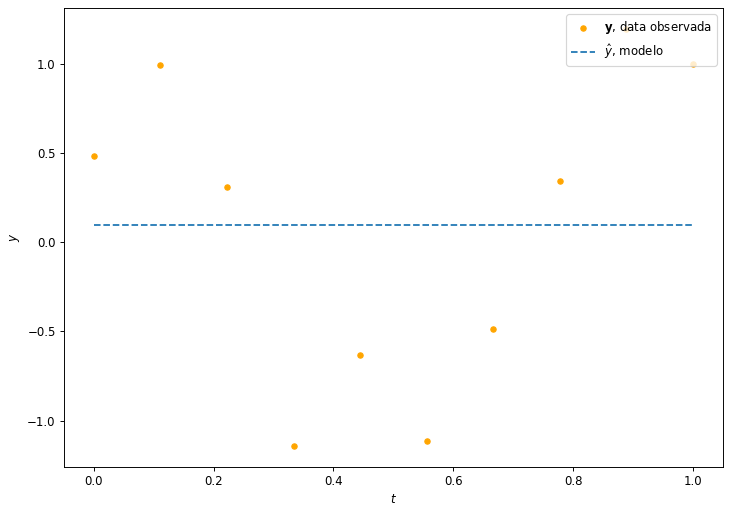

In [740]:
fig,ax = plt.subplots(1,1,figsize=(10,7),dpi=85)
ax.scatter(t,y_noisy,label=r"$\mathbf{y}$, data observada",s=20,c='orange')
ax.plot(t,y_hat,label=r"$\hat{y}$, modelo",ls='--')
ax.set_ylabel(r"$y$")
ax.set_xlabel(r"$t$")
ax.legend(loc='upper right')
plt.show()


¿Qué tal se ajusta a los datos?

## Caso $K=1$
En el caso $K=1$ tenemos dos parámetros para optimizar ya que $\mathbf{w}=(w_0 ,w_1)^T$, de tal suerte que tenemos:
$$
\partial_{w_{0}} E(\mathbf{w}) = 0 \\
\partial_{w_{1}} E(\mathbf{w}) = 0
$$
Realizando las derivadas obtenemos el siguiente sistema para $\mathbf{w}$:
$$
\begin{align*}
    w_{0} \displaystyle\sum_{n=1}^{N} t_{n}^{0} + w_{1} \displaystyle\sum_{n=1}^{N}t_{n} &=\displaystyle\sum_{n=1}^{N} y_{n} \\
    w_{0}\displaystyle\sum_{n=1}^{N}t_{n} + w_{1}\displaystyle\sum_{n=1}^{N} t_{n}^{2} &= \displaystyle\sum_{n=1}^{N}t_{n}y_{n}
\end{align*}
$$
En términos de multiplicación de vector-matriz lo podemos expresar como:
$$
\begin{bmatrix} N & \displaystyle\sum_{n=1}^{N}t_{n} \\ \displaystyle\sum_{n=1}^{N}t_{n} & \displaystyle\sum_{n=1}^{N}t_{n}^{2} \end{bmatrix} \times \left[ \begin{array}{c} w_{0} \\ w_{1} \end{array} \right] = \left[ \begin{array}{c} \displaystyle\sum_{n=1}^{N}y_{n} \\ \displaystyle\sum_{n=1}^{N}t_{n}y_{n} \end{array} \right]
$$
Este problema tiene ahora la forma:
$$
A\mathbf{x} = \mathbf{z}
$$
Y se puede resolver multiplicando por la izquierda en ambos lados de la igualdad por la inversa de la matriz $A$, es decir, $A^{-1}$:
$$
\mathbf{x} = A^{-1} \mathbf{z}
$$
Antes de avanzar, es importante entender cómo trabajar con matrices en python. Lo más común es hacerlo mediante un módulo de nombre _[Numpy](https://numpy.org/)_ (**Num**erical **Py**thon). 

### Introducción a Álgebra Lineal en Python

In [741]:
### Acceder a un valor en la matriz o vector
# Los vectores están indexados como listas, un vector x tiene elementos x_j y se accede con x[j]
# Las matrices están indexadas con dos valores (renglon, columna), es decir una matriz A
# tiene elementos a_ij y se puede acceder a este valor por medio de A[i,j]
# NOTA: los índices en python siempre empiezan en 0.

x = np.array([1,2,3,5]) # Así se declara el vector x = (1,2,3,4)

print('x[0] =',x[0]) # Así se accede al primer elemento del vector
print('x[1] =',x[1]) # Así se accede al segundo elemento del vector
print('x[2] =',x[2]) # Así se accede al tercer elemento del vector
print('x[3] =',x[3]) # Así se accede al cuarto elemento del vector
print('-------\n')

A = np.matrix([[1,2,3],[4,5,6]]) # Esto crea una matriz de dos reglones y tres columnas

print('A[0,0] = ', A[0,0]) # Así se accede al elemento en el primer renglon y primera columna
print('A[1,0] = ', A[1,0]) # Así se accede al elemento en el segundo renglon y primera columna

print('A[0,2] = ', A[0,2]) # Así se accede al elemento en el primer renglon y tercera columna
print('A[1,2] = ', A[1,2]) # Así se accede al elemento en el segundo renglon y tercera columna

x[0] = 1
x[1] = 2
x[2] = 3
x[3] = 5
-------

A[0,0] =  1
A[1,0] =  4
A[0,2] =  3
A[1,2] =  6


In [742]:
### Tamaño/Dimensión de un vector o una matriz
# La dimensión de un vector x es la cantidad de elementos que tiene,
# esto se puede obtener usando la función x.size
# En el caso de una matriz A la dimensión no es un número entero sino,
# la tupla ordenada (cantidad de renglones, cantidad de columnas) y se puede
# obtener mediante A.shape

x = np.array([1,2,3,5]) # Así se declara el vector x = (1,2,3,4)
print('Dimension del vector x: ',x.size)

A = np.matrix([[1,2,3],[4,5,6]]) # Esto crea una matriz de dos reglones y tres columnas
print('Dimensión de matriz A:' ,A.shape)


Dimension del vector x:  4
Dimensión de matriz A: (2, 3)


In [743]:
### Multiplicación de vectores: producto punto o producto escalar
# Si A, B son vectores entonces sólo está definido el prodcuto punto como:
# <A,B> = A' B = B' A = A_0*B_0 + A_1 B_1 + ... + A_N-1 * B_N-1
# Notemos que A^2 = <A,A> = A_0*A_0 + A_1*A_1 + ... + A_N-1 * A_N-1

A = np.matrix([[1],[2],[3]]) # Es útil declarar los vectores como matrices,
B = np.matrix([[1],[2],[3]]) # Es más práctico para las operaciones y nos habilita operadores

C = np.matmul(A.T,B)

print('C = ' + str(C))

C = [[14]]


In [744]:
### Multiplicación de un vector por una matriz
# Si A es una matriz de tamaño 'mxn' y x un vector de tamaño 'nx1' entonces A*x = C
# Con C una matriz de tamaño 'mx1'. Los elementos de C son de la forma
# C[i] = A[i,0]*x[0] + A[i,1]*x[1] + ... + A[i,n]*x[n]

A = np.matrix([[1],[2]]) # Este es un vector columna
B = np.matrix([[1,2],[3,4],[5,6]]) # Esto es una matriz
C = B@A #El operador '@' corresponde a la operación de multiplicación de matrices

print(B)
print('----')

print(A)
print('----')

print(C)

[[1 2]
 [3 4]
 [5 6]]
----
[[1]
 [2]]
----
[[ 5]
 [11]
 [17]]


In [745]:
#La inversa de una matriz A se calcula con la función np.inv(A)
#Notemos que A * A^-1 = I
A = np.matrix([[1,2],[3,4]]) # Esto es la matriz,
B = np.linalg.inv(A) # Esto es la inversa de la matriz
C = A@B

print(A)
print('----')

print(B)
print('----')

print(C)

[[1 2]
 [3 4]]
----
[[-2.   1. ]
 [ 1.5 -0.5]]
----
[[1.0000000e+00 0.0000000e+00]
 [8.8817842e-16 1.0000000e+00]]


Una cosa interesante es que, en teoría, la multiplicación de una matriz por su inversa debería de darnos la matriz identidad:
$$
A A^{-1} = A^{-1} A = I
$$
En el último ejemplo podemos ver que sí tenemos _1_ en la diagonal, pero en la anti-diagonal no todos los términos son _0_. Hay un valor muy pequeño de $8.8\times 10^{-16}$, esto pasa porque las representaciones de números en la computadora no son _abstractas_, son aproximaciones. En términos prácticos eso es un _0_. Sin embargo, hay que tener cuidado pues esos valores nos pueden introducir errores en la aproximación de nuestros parámetros. 

### De vuelta al caso $K=1$
Retomando el problema. La última ecuación derivada es:
$$
\begin{bmatrix} N & \displaystyle\sum_{n=1}^{N}t_{n} \\ \displaystyle\sum_{n=1}^{N}t_{n} & \displaystyle\sum_{n=1}^{N}t_{n}^{2} \end{bmatrix} \times \left[ \begin{array}{c} w_{0} \\ w_{1} \end{array} \right] = \left[ \begin{array}{c} \displaystyle\sum_{n=1}^{N}y_{n} \\ \displaystyle\sum_{n=1}^{N}t_{n}y_{n} \end{array} \right]
$$
La matriz del lado derecho puede ser escrita en Python con las cantidades:
$$\begin{pmatrix} T.size & np.sum(T) \\ np.sum(T) & np.sum(T*T) \end{pmatrix} $$
Y el vector de la derecha como:
$$\begin{pmatrix} np.sum(Y) \\ np.sum(T*Y) \end{pmatrix}$$

In [746]:
A = np.matrix([[t.size, np.sum(t)],[np.sum(t),sum(t**2)]])
z = np.matrix([[np.sum(y_noisy)],[np.sum(y_noisy*t)]])
W = np.linalg.inv(A)@z

print('w_0 = ',W[0,0])
print('w_1 = ',W[1,0])

w_0 =  -0.11568251365061512
w_1 =  0.4198646561998182


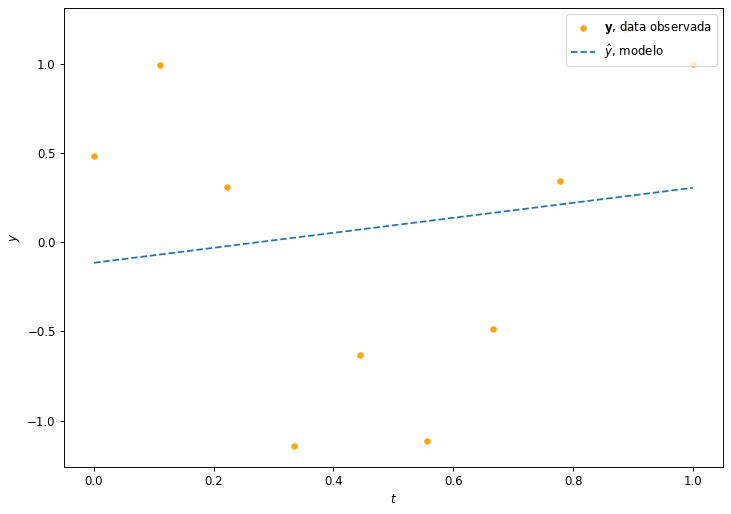

In [747]:
y_hat = np.asarray([W[0,0] + t_i*W[1,0] for t_i in t]) # Calculamos y_hat(t_i,W) = w_0 + t_i * w_1 para cada t_i

fig,ax = plt.subplots(1,1,figsize=(10,7),dpi=85)
ax.scatter(t,y_noisy,label=r"$\mathbf{y}$, data observada",s=20,c='orange')
ax.plot(t,y_hat,label=r"$\hat{y}$, modelo",ls='--')
ax.set_ylabel(r"$y$")
ax.set_xlabel(r"$t$")
ax.legend(loc='upper right')
plt.show()

¿Qué tal quedó este ajuste?

## Caso General $K$
Antes de avanzar más, para el caso de un polinomio de orden $K$ minimizando para el coeficiente $w_{i}$ la ecuación resultante será:
$$
w_{0}\displaystyle\sum_{n=1}^{N} t_{n}^{i} + w_{1}\displaystyle\sum_{n=1}^{N} t_{n}^{1+i} + w_{2}\displaystyle\sum_{n=1}^{N} t_{n}^{2+i} + \cdots + w_{K}\displaystyle\sum_{n=1}^{N} t_{n}^{K+i} = \displaystyle\sum_{n=1}^{N} t_{n}^{i} y_{n}
$$
Como el problema $A\mathbf{w} = \mathbf{z}$ es siempre lineal en $\mathbf{w}$ entonces se puede escribir cada elemento de la matriz $A$ como:
$$
\begin{equation*}
(\mathbf{A})_{ij} = \displaystyle\sum_{n=1}^{N} t_{n}^{i+j}
\end{equation*}
$$
Y sin importar el tamaño de $\mathbf{A}$ será cuadrada ($\mathbf{A} \in \mathcal{M}_{K\times K}(\mathbb{R})$) y también simétrica: 
$$
\begin{equation*} 
(\mathbf{A})_{ij} = \displaystyle\sum_{n=1}^{N} t_{n}^{i+j} = \displaystyle\sum_{n=1}^{N} t_{n}^{j+i} = (\mathbf{A})_{ij}
\end{equation*}
$$
Es importante notar también que $(\mathbf{z})_{i} = \displaystyle\sum_{n=1}^{N} t_{n}^{i} y_{n}$. 

Lo anterior permite crear funciones que generen automáticamente a la matriz $\mathbf{A}$ y al vector $\vec{z}$, y que reciban como entrada el orden del polinomio a ajustar ($K$) y los vectores $\mathbf{y}$ y $\mathbf{t}$.

In [748]:
def matrix_A(K,t):
    """
    Esta función crea la matriz A del problema Ax = z que que fue definido previamente

    Parameters
    ----------
    K : int
        El orden del polinomio
    t : array
        El vector de los momentos donde observamos
    
    Returns
    ----------
    numpy.matrix
        La matriz A para el problema Aw = z
    """
    if K == 0:
         A = np.zeros((1,1))
         K = K + 1 # Recordemos que un polinomio de orden K tiene un vector W de tamaño K+1
    else:
        K = K + 1 # Recordemos que un polinomio de orden K tiene un vector W de tamaño K+1
        A = np.zeros((K,K)) # Creamos la matriz de ceros de tamaño K x K
    for i in range(K): # Por cada renglón
        for j in range(K): # Vamos por cada columna
            A[i,j] = np.sum(t ** (i+j)) # Calculamos la suma de los parámetros a la potencia j+i
    return A

def vector_z(K,y,t):
    """
    Esta función crea la el vector z del problema Ax = z que fue definido previamente

    Parameters
    ----------
    K : int
        El orden del polinomio
    t : array
        El vector de los momentos donde observamos y_i
    y : array
        El vector de las observaciones y_i, cada una corresponde con un t_i
    
    Returns
    ----------
    numpy.matrix
        El vector z para el problema Aw = z
    """
    if K == 0:
        z = np.zeros((1,1))
        K = K + 1
    else:
        K = K + 1
        z = np.zeros((K,1)) # Creo el vector columna con K reglones
    for i in range(K):
        z[i] = np.sum(t**i * y)
    return z

Para verificar que construimos de manera adecuada las funciones, tenemos dos casos de prueba:
* Caso $K=0$ con $w_0 \approx 0.0347$
* Caso $K=1$ con $\mathbf{w} \approx (0.0243,0.0207)^T$

In [749]:
# Caso K = 0
w = np.linalg.inv(matrix_A(0,t))@vector_z(0,y_noisy,t)
print("Caso K = 0")
print("-----")
print('w = ',w)

Caso K = 0
-----
w =  [[0.09424981]]


In [750]:
# Caso K = 1
w = np.linalg.inv(matrix_A(1,t))@vector_z(1,y_noisy,t)
print("Caso K = 1")
print("-----")
print('w = ',w)

Caso K = 1
-----
w =  [[-0.11568251]
 [ 0.41986466]]


Después de la inspección manual es posible corroborar que los resultados son correctos.

¡Perfecto! Ya que es posible resolver el sistema para cualquier orden, es fácil ver cómo se ven algunos ajustes para distintos ordenes del polinomio:

In [751]:
K = [1, 3, 5, 7, 9, 11]
W = []
for k in K:
    W.append(np.linalg.inv(matrix_A(k,t))@vector_z(k,y_noisy,t))

Lo único que hace falta definir es una función que dado un vector $\mathbf{w}$ y un vector de momentos de observación $\mathbf{t}$ nos regrese un vector de aproximaciones $\mathbf{\hat{y}}$

In [752]:
def adjustPoly(t,W):
    """
    Esta función calcula los puntos y_hat para cada t_i.
    Notemos que es un poco abstracta cumple con el objetivo
    """
    R = [] #inicializamos la lista
    for i in range(W.size): # Iteramos sobre el orden + 1 del polinomio
        R.append(W[i,0] * t**i) # Creamos cada unos de los vectores, evaluamos por partes el polinomio
    return sum(R) # Sumamos los vectores creados y regresamos el conjunto de datos y_hat

Ahota vamos a visualizar todos esos ajustes:

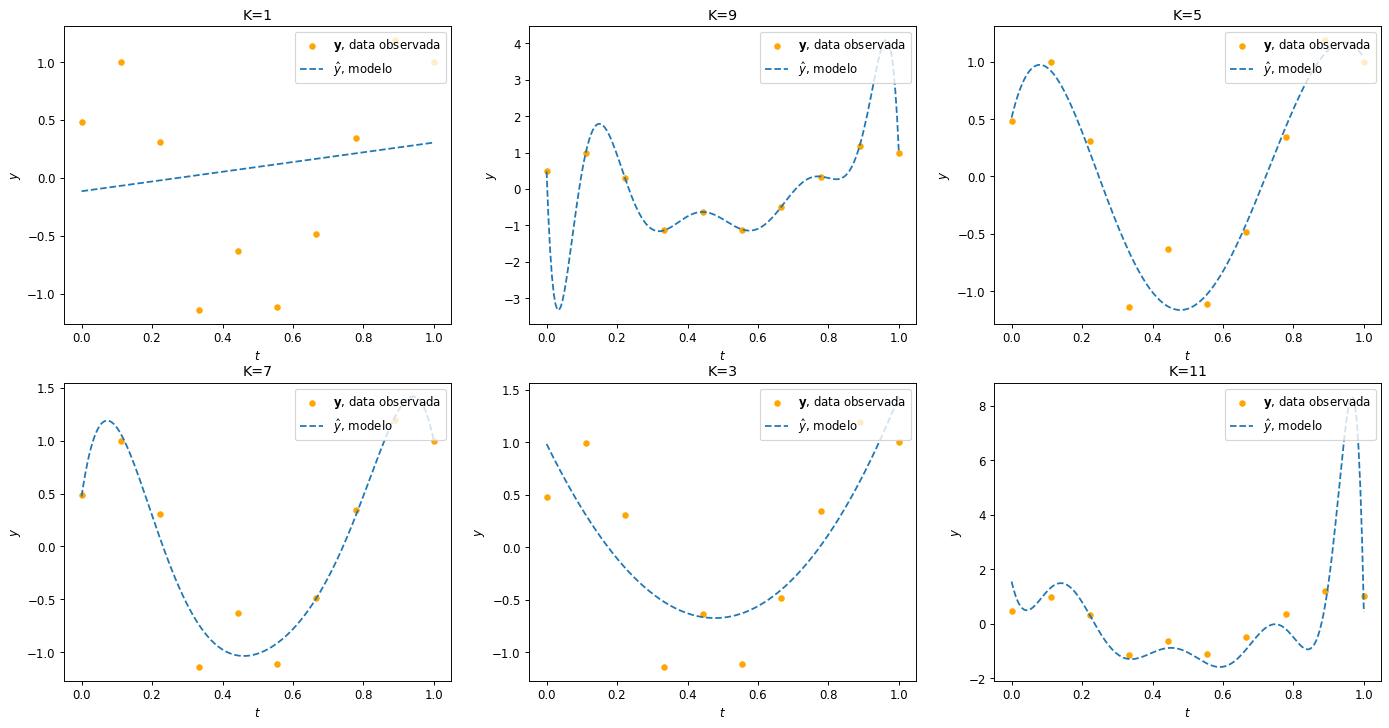

In [753]:
fig,ax = plt.subplots(2,3,figsize=(20,10),dpi=85)
p = np.linspace(0,1,200) # puntos para suavizar nuestra aproximación

for i in range(len(K)):
    ax[i%2,i%3].scatter(t,y_noisy,label=r"$\mathbf{y}$, data observada",s=20,c='orange')
    ax[i%2,i%3].plot(p,adjustPoly(p,W[i]),label=r"$\hat{y}$, modelo",ls='--')
    ax[i%2,i%3].set_title("K={}".format(K[i]))
    ax[i%2,i%3].set_ylabel(r"$y$")
    ax[i%2,i%3].set_xlabel(r"$t$")
    ax[i%2,i%3].legend(loc='upper right')

**En resumen**: Ya hay una forma de _entrenar_ al modelo (sin importar el orden del polinomio), sin embargo hace falta que tan bueno o malo es el ajuste y la _generalización_ que puede hacer el modelo. Se necesitan hacer nuevas mediciones para obtener un _test set_ y medir que tan buena o mala es la generalización que puede hacer este modelo.

Para lo anterior es necesario encontrar un forma de medir el error de _manera absoluta_ y así, sin importar si los tamaños del _training set_ y del _test set_ son distintos, podamos hacer una comparación de los errores.

**Nota**: Aunque ya tenemos una forma de medir el error del ajuste $E(\mathbf{w})$ la escala del error está en función del tamaño del conjunto de datos que se use y además no está ni en las unidades del vector objetivo ni en la misma escala.

Debido a las necesidades del modelo lo más conveniente es introducir el el **error cuadrático medio**:
$$
    E_{RMS} = \sqrt{\displaystyle\frac{2 E\left(\mathbf{w^\star}\right)}{N}}
$$

Esta cantidad ya está en las unidades y escala de nuestras mediciones iniciales, sí nos puede decir, de manera más o menos objetiva -salvo un bias- qué tan cerca o lejos estamos de nuestro valor inicial. 

Ahora, con el afán de seguir lo anterior, vamos a crear primero una función para calcular el error cuadrático medio.

In [754]:
def Erms(W,t,y):
    y_hat = adjustPoly(t=t,W=W) # calculamos el conjunto y_hat
    delta_vect = np.asarray(y_hat) - y # calculamos la diferencia entre la predicción y los datos reales
    delta_vect = delta_vect ** 2 # calculamos el cuadrado de cada término
    return np.sqrt(np.sum(delta_vect)/t.size) #calculamos la raíz de la suma de los cuadrados de las diferencias entre la cantidad de datos

Ahora, vamos a hacer un set de prueba. Supongamos que las mediciones que hacemos nuevamente de la señal inicial $\cos(2\pi x)$ es ahora más ruidosa, es más, ahora se comporta de manera disinta. Sin embargo, ahora podemos hacer más mediciones que antes, llegando así a 200 datos.

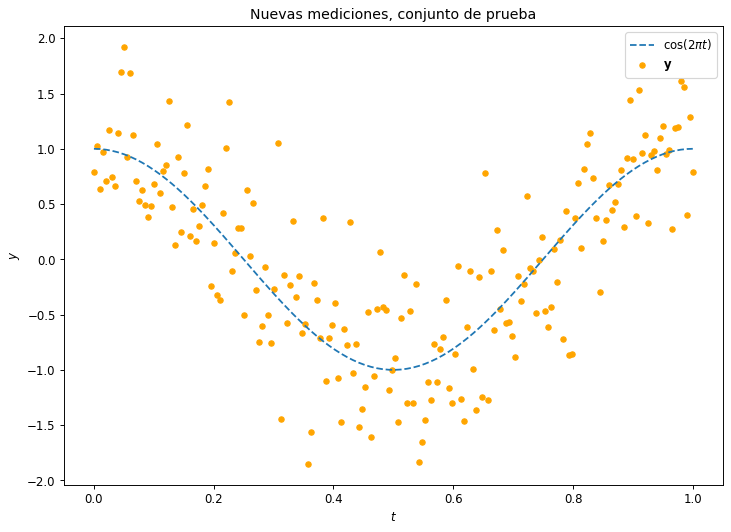

In [760]:
f = lambda t : np.cos(2*np.pi*t) # declaramos nuestra función cos(2 pi t)

t_test = np.linspace(0,1,200) # creamos 200 puntos equidistantes en el intervalo cerrado [0, 1]
y = f(t_test) # Evaluamos los puntos en nuestra función

y_noisy_test = np.asarray([y_i - np.random.normal(scale=0.5) for y_i in y]) # Notemos que el ruido ahora tiene una desv est de 0.5

fig,ax = plt.subplots(1,1,figsize=(10,7),dpi=85)
ax.plot(t_test,y,label=r"$\cos(2\pi t)$",ls='--')
ax.scatter(t_test,y_noisy_test,label=r"$\mathbf{y}$",s=20,c='orange')
ax.set_title("Nuevas mediciones, conjunto de prueba")
ax.set_ylabel(r"$y$")
ax.set_xlabel(r"$t$")
ax.legend(loc='upper right')
plt.show()

Ahora, vamos a entrear a nuestro modelo con nuestros datos iniciales desde $K=1$ hasta $K = 15$ mediremos el error y lo pondremos a prueba con los nuevos datos. El fénomeno subyacente es el mismo, está generado con $\cos(2\pi t)$, pero veremos cómo cambia el error.

In [764]:
# Aquí se entrena al modelo
Parametros_Entrenamiento = []
for k in range(0,11):
    Parametros_Entrenamiento.append(np.linalg.inv(matrix_A(k,t))@vector_z(k,y_noisy,t)) # Aquí se calculan el vector de parámetros W para cada k

In [765]:
Error_Entrenamiento = []
Error_Prueba = []

for w in Parametros_Entrenamiento:
    Error_Entrenamiento.append(Erms(w,t,y_noisy)) # Aquí se evalua el error para cada conjunto de parámetros W en el conjuto de datos inicial
    Error_Prueba.append(Erms(w,t_test,y_noisy_test)) # Aquí se evalua el error cada conjunto de parámetros W en el conjuto de datos de prueba

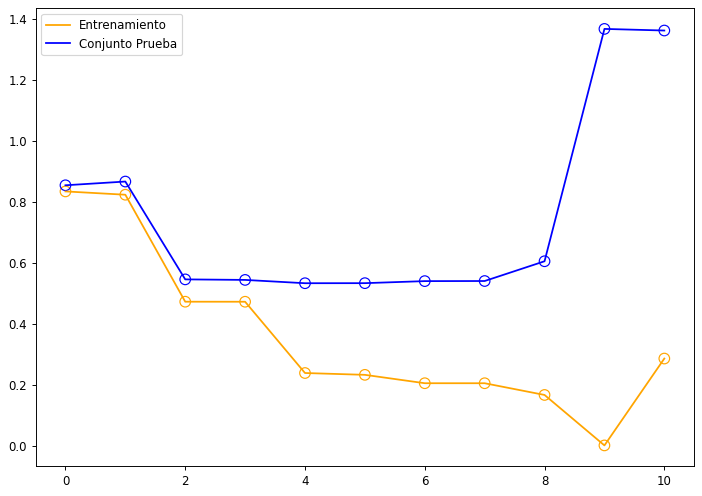

In [766]:
K = np.arange(0,11) # Creamos un arreglo con los valores del 1 al 15

fig,ax = plt.subplots(1,1,figsize=(10,7),dpi=85)

ax.plot(K,Error_Entrenamiento,color = 'orange', label = 'Entrenamiento')
ax.scatter(K,Error_Entrenamiento,s=80, facecolors='none',color='orange')

ax.plot(K,Error_Prueba,color = 'blue', label = 'Conjunto Prueba')
ax.scatter(K,Error_Prueba,s=80, facecolors='none',color='blue')

ax.legend()
plt.show()


**¡Para $K=9$ el error del conjunto de entramiento se va a cero!**... Pero no para el conjunto de prueba.

Los casos en que el error se va a cero decimos que tenemos un problema de _over-fitting_ (sobre ajuste). Lo anterior sucede ya que el polinomio contiene 10 grados de libertad correspondientes a los 10 coeficientes: $w_{0},\cdots,w_{9}$ de manera que así podemos ajustar de manera exacta los 10 puntos de nuestro conjunto de datos de entrenamiento.Notemos que para el mismo caso de $K=9$ el problema de sobre ajuste se vuelve menos severo si el tamaño del training set aumenta. Para ejemplificarlo entrenare con los datos originales y con los del prueba.

In [768]:
Entrenamieto_params = []
Entrenamieto_params.append(np.linalg.inv(matrix_A(9,t))@vector_z(9,y_noisy,t))
Entrenamieto_params.append(np.linalg.inv(matrix_A(9,t_test))@vector_z(9,y_noisy_test,t_test))

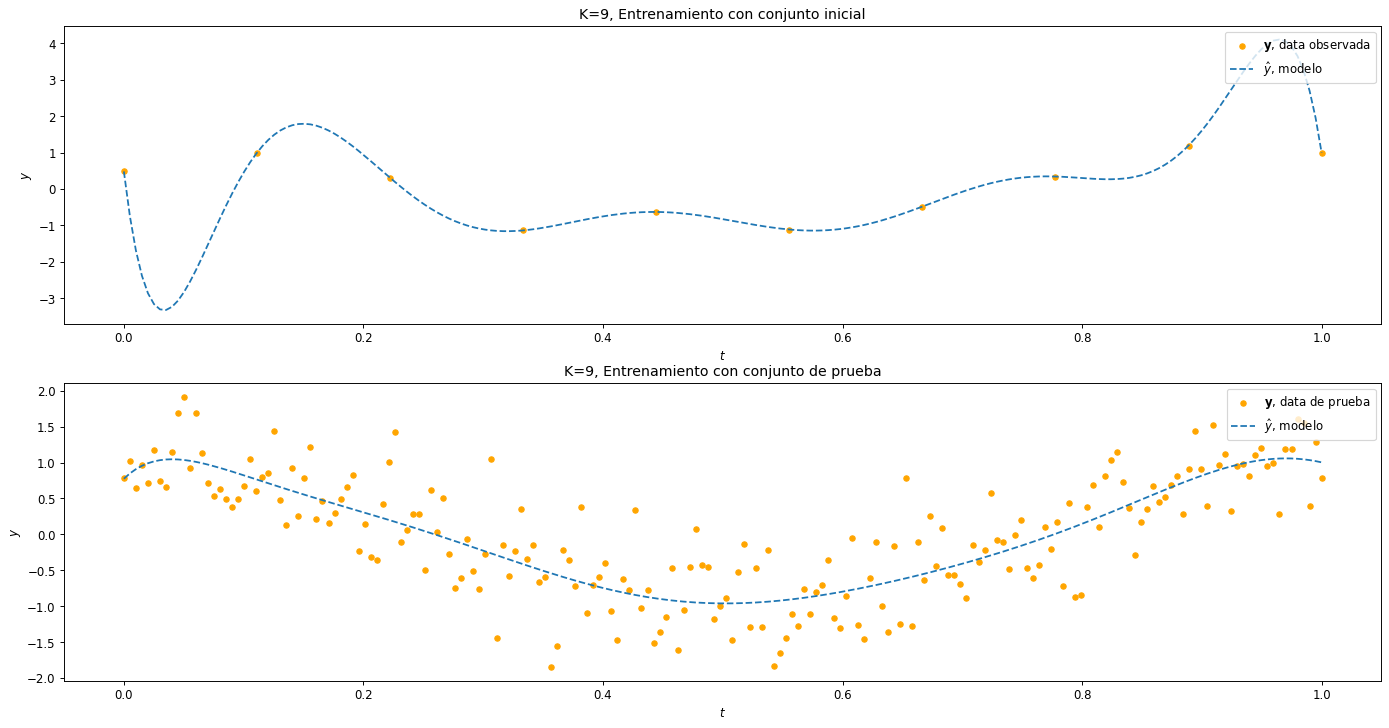

In [772]:
fig,ax = plt.subplots(2,1,figsize=(20,10),dpi=85)
p = np.linspace(0,1,200) # puntos para suavizar nuestra aproximación

ax[0].scatter(t,y_noisy,label=r"$\mathbf{y}$, data observada",s=20,c='orange')
ax[0].plot(p,adjustPoly(p,Entrenamieto_params[0]),label=r"$\hat{y}$, modelo",ls='--')
ax[0].set_title("K=9, Entrenamiento con conjunto inicial")
ax[0].set_ylabel(r"$y$")
ax[0].set_xlabel(r"$t$")
ax[0].legend(loc='upper right')

ax[1].scatter(t_test,y_noisy_test,label=r"$\mathbf{y}$, data de prueba",s=20,c='orange')
ax[1].plot(p,adjustPoly(p,Entrenamieto_params[1]),label=r"$\hat{y}$, modelo",ls='--')
ax[1].set_title("K=9, Entrenamiento con conjunto de prueba")
ax[1].set_ylabel(r"$y$")
ax[1].set_xlabel(r"$t$")
ax[1].legend(loc='upper right')

plt.show()

Desde el principio postulamos un problema de minimización. No es de sorpresa que siguiendo estos métodos eventualemte arribemos a un caso donde el error es cero, a un caso de _máxima verisimilitud_ (máximo _likelihood_); al final, el problema de over-fitting será un problema caracteristico de postular la minimización del error (en el sentido de minimos cuadrados). Lo usal es que se adopte un enfoque Bayesiano, donde el problema del overfitting es evitado haciendo que el número _efectivo_ de parámetros se adapate automáticamente al tamaño del conjunto de entrenamiento.

Hay modelos más sencillos, pero que puedan capturar la complejidad del modelo, y más flexibles. Una técnica usada comúnmente para controlar el fenómeno del sobreajuste es la regularización, la cual consiste en agregar un término de penalización/política para evitar que los coeficientes alcancen grandes valores.
$$
\displaystyle\widetilde{E}(\vec{w}) = \frac{1}{2}\displaystyle\sum_{n=1}^{N} \{\hat{y}(t_{n},\mathbf{w}) - t_{n}\}^2 + \frac{\lambda}{2}\langle \mathbf{w},\mathbf{w}\rangle
$$
Sin embargo, vamos a pasar a dos ejemplos con datos reales antes de desarrollar más esta herramienta. 

## Ley de enfriamiento de Newton

Newton propusó que un objeto a temperatura $T$ se enfría de manera proporcional a la temperatura del objeto y la temperatura del ambiente que le rodea $T_a$. Es decir:
$$
\frac{dT}{dt} = k(T-T_a)
$$
Es posible encontrar una solución exacta a esta ecuación:
$$
\begin{align*}
\frac{1}{(T-T_{a})}\frac{dT}{dt} &= k, \qquad integramos\; respecto\; al\; tiempo, \\

\displaystyle\int \frac{1}{(T-T_{a})}\frac{dT}{dt} dt &= \displaystyle\int k dt \qquad si\; \hat{T} = T\; entonces\; d\hat{T} = \frac{dT}{dt} dt \\

\displaystyle\int \frac{1}{(\hat{T}-T_{a})} d\hat{T} &= \displaystyle\int k dt \qquad integrando\; ambos \;lados \\

ln(\hat{T} - T_{a}) &= kt + cte \qquad esta\; ecuación\; es\; importante, \; desarrollamos \\

T(t) - T_{a} &= e^{kt + cte} \qquad si\; T(t=0) = T_{0} \\ \\

\because T(t) &=  T_{a} + (T_{0}-T_{a})e^{kt} 
 

\end{align*}
$$

Notemos que esta ecuación tiene tres parámetros: 
* la temperatura inicial $T_0$ del objeto, 
* la temperatura ambiental $T_{a}$,
* la constante de enfriamiento $k$,

A continuación visualizaremos una serie de datos obtenidos al medir en tres vasos de precipitados, 100 ml, 300 ml y 800 ml, la temperatura cada minuto por 35 minutos y cada 5 minutos hasta completar la hora. La temperatura ambiente se reporta en 23°C.


In [779]:
import seaborn as sbn # Aquí viven las funciones para hacer gráficos con bases de datos
import pandas as pd # Aquí están las funciones para manejar conjuntos de datos

url_data = 'https://raw.githubusercontent.com/uncrayon/biologia-matematica/refs/heads/main/_data/cooling_data.csv' # Aquí puedes encontrar la data cruda

 # Aquí cargamos el archivo, 
df = pd.read_csv(
    filepath_or_buffer=url_data, # Aquí se cargan los datos
    skiprows=4 # Si consultas los datos verás que hay info sobre el conjunto de datos, saltamos esos primeros renglones
) 

df.head(10) # Mostramos los primeros 10 renglones

,Time (min),100 ml Temperature °C,300 ml Temperature °C,800 ml Temperature °C
0,0,100,100,100
1,1,95,95,96
2,2,82,91,95
3,3,79,87,92
4,4,74,84,90
5,5,70,81,88
6,6,67,78,85
7,7,65,76,83
8,8,61,73,80
9,9,59,71,78


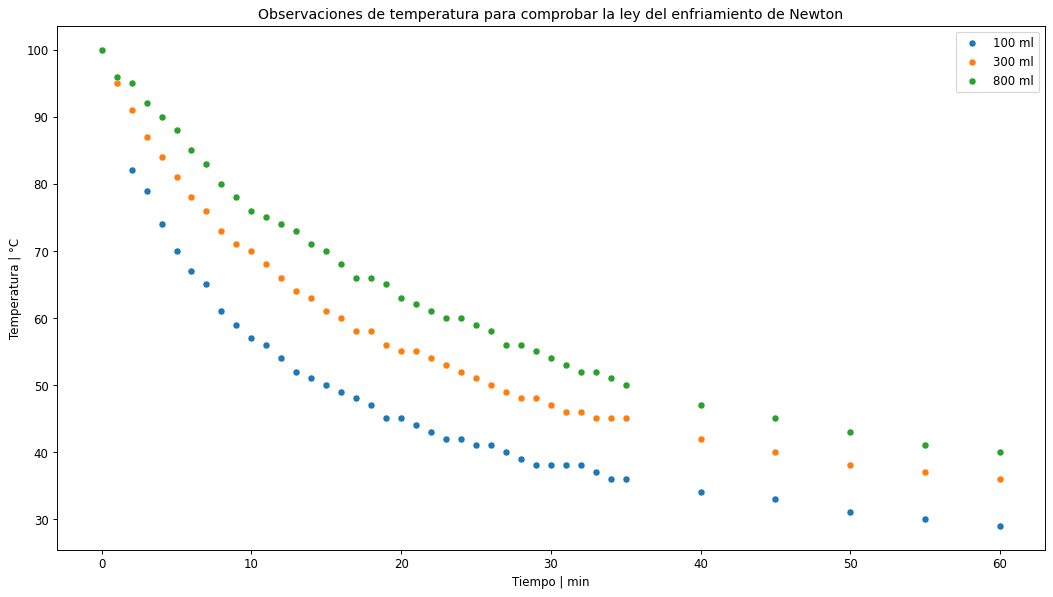

In [791]:
fig, ax = plt.subplots(1,1,figsize=(15,8),dpi=85)

ax = sbn.scatterplot(
    data = df,
    x = 'Time (min)',
    y = '100 ml Temperature °C',
    label = '100 ml',
    ax=ax
)

ax = sbn.scatterplot(
    data = df,
    x = 'Time (min)',
    y = '300 ml Temperature °C',
    label = '300 ml',
    ax=ax
)

ax = sbn.scatterplot(
    data = df,
    x = 'Time (min)',
    y = '800 ml Temperature °C',
    label = '800 ml',
    ax=ax
)

ax.set_xlabel('Tiempo | min')
ax.set_ylabel('Temperatura | °C')
ax.set_title('Observaciones de temperatura para comprobar la ley del enfriamiento de Newton')
ax.legend()
plt.show()

Con una inspección a los datos podemos es posible observar un comportamiento muy similar a una exponencial, como en la solución que se presenta de la ecuación diferencial. 

Si tomamos la solución de la ecuación
$$
T(t) =  T_{a} + (T_{0}-T_{a})e^{kt} 
$$
La podemos reescribir como:
$$
T(t) =  T_{a} + e^{\ln(T_{0}-T_{a})}e^{kt} = T_{a} + e^{\ln(T_{0}-T_{a}) + kt}
$$
Sumando $- T_a$ en ambos lados y aplicando el logaritmo:
$$
\ln{(T(t) - T_{a})} = \ln(T_{0}-T_{a}) + kt
$$
Y esto último la ecuación de una recta. 

Si tomamos la ecuación anterior, en la ecuación anterior $\ln(T_{0}-T_{a})$ es una constante. Podemos calcular entonces la cantidad $\ln{(T(t) - T_{a})}$ que sí varia en el tiempo. 

In [797]:
T_0 = 100 # La temperatura inicial es 100°C
T_a = 23 # La temperatura ambiental es 23°C

print("La cantidad ln(T_0-T_a) = {:.4}".format(np.log(T_0-T_a)))

La cantidad ln(T_0-T_a) = 4.344


In [802]:
transform =  lambda x: np.log(x-T_a)

df['transform 100 ml'] = df['100 ml Temperature °C'].apply(transform) # aquí creamos una nueva columna con los datos tranformados para 100 ml
df['transform 300 ml'] = df['300 ml Temperature °C'].apply(transform) # aquí creamos una nueva columna con los datos tranformados para 300 ml
df['transform 800 ml'] = df['800 ml Temperature °C'].apply(transform) # aquí creamos una nueva columna con los datos tranformados para 800 ml

df.head(10)

,Time (min),100 ml Temperature °C,300 ml Temperature °C,800 ml Temperature °C,transform 100 ml,transform 300 ml,transform 800 ml
0,0,100,100,100,4.343805,4.343805,4.343805
1,1,95,95,96,4.276666,4.276666,4.290459
2,2,82,91,95,4.077537,4.219508,4.276666
3,3,79,87,92,4.025352,4.158883,4.234107
4,4,74,84,90,3.931826,4.110874,4.204693
5,5,70,81,88,3.850148,4.060443,4.174387
6,6,67,78,85,3.784190,4.007333,4.127134
7,7,65,76,83,3.737670,3.970292,4.094345
8,8,61,73,80,3.637586,3.912023,4.043051
9,9,59,71,78,3.583519,3.871201,4.007333


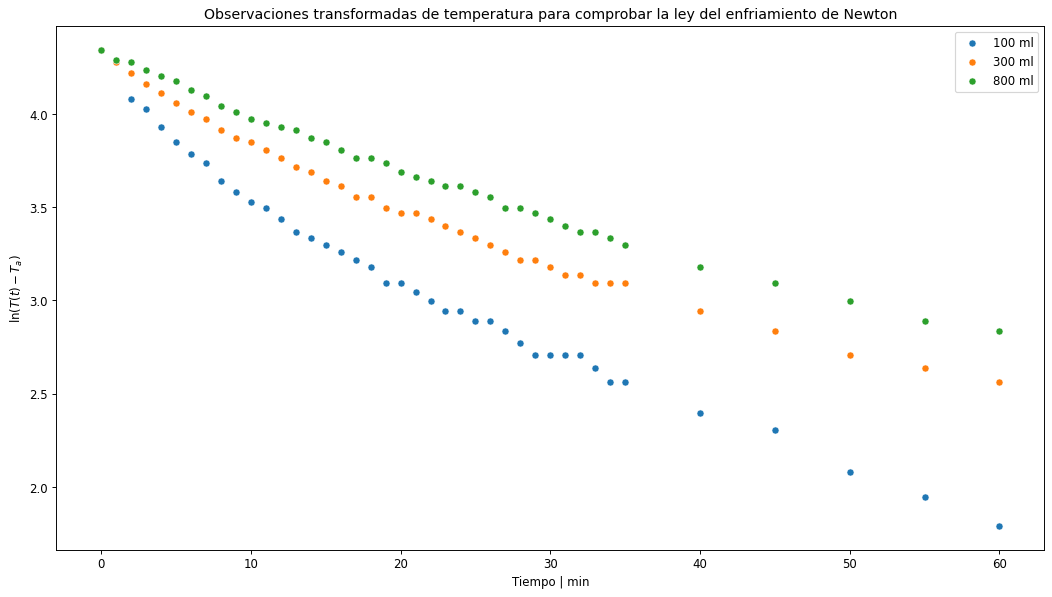

In [805]:
fig, ax = plt.subplots(1,1,figsize=(15,8),dpi=85)

ax = sbn.scatterplot(
    data = df,
    x = 'Time (min)',
    y = 'transform 100 ml',
    label = '100 ml',
    ax=ax
)

ax = sbn.scatterplot(
    data = df,
    x = 'Time (min)',
    y = 'transform 300 ml',
    label = '300 ml',
    ax=ax
)

ax = sbn.scatterplot(
    data = df,
    x = 'Time (min)',
    y = 'transform 800 ml',
    label = '800 ml',
    ax=ax
)

ax.set_xlabel('Tiempo | min')
ax.set_ylabel(r'$\ln(T(t)-T_a)$')
ax.set_title('Observaciones transformadas de temperatura para comprobar la ley del enfriamiento de Newton')
ax.legend()
plt.show()

La data tranformada sí parece una recta con una pendiente negativa (lo cual indicaría que k < 0) y además con una ordenada al origen cerca del 0. 

Si tratamos de ajustar un polinomio de orden $K=1$ vamos a encontrar dos parámetros $(w_0 , w_1)$. Sabemos a priori que $w_{0} \approx 4.3$ y $w_1$ sería equivalente a $k$.

In [810]:
df.columns

Index(['Time (min)', '100 ml Temperature °C', '300 ml Temperature °C',
       '800 ml Temperature °C', 'transform 100 ml', 'transform 300 ml',
       'transform 800 ml'],
      dtype='object')

In [833]:
K = 1 # Orden del polinomio

t = df['Time (min)'].values # Obtenemos los datos para los momentos de observación

y = df['transform 800 ml'].values # Obtenemos únicamente los datos transformados de la temperatura

W = np.linalg.inv(matrix_A(K,t))@vector_z(K,y,t)

print("El parámetro w_0 = {:.3}, y el parámetro w_1 = k = {:.3}".format(W[0][0],W[1][0]))

erms = Erms(W,t,y)
print("El error cuadrático medio es {:.3f}, representa {:.2f}% del valor más pequeño medido (transformado)".format(erms,(erms/np.min(y)*100)))

El parámetro w_0 = 4.25, y el parámetro w_1 = k = -0.0263
El error cuadrático medio es 0.046, representa 1.61% del valor más pequeño medido (transformado)


El valor calculado de $w_0 \approx 4.25$ mientras que el de nuestros datos indica que es $\approx 4.3$.

Veamos cómo luce nuestra solución contra nuestros datos.

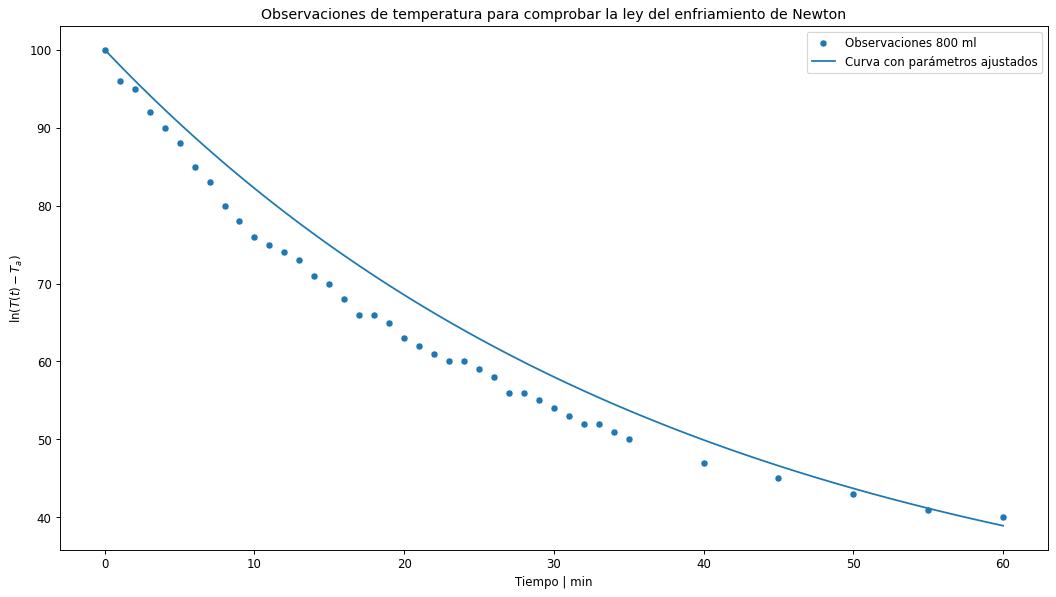

In [845]:
_time = np.linspace(0,60,100) # datos para suavizar la curva ajustada
_adjusted_data = T_a + (T_0 - T_a) * np.exp(W[1][0]*_time)

fig, ax = plt.subplots(1,1,figsize=(15,8),dpi=85)

ax = sbn.scatterplot(
    data = df,
    x = 'Time (min)',
    y = '800 ml Temperature °C',
    label = 'Observaciones 800 ml',
    ax=ax
)

ax = sbn.lineplot(
    x = _time,
    y = _adjusted_data,
    label = 'Curva con parámetros ajustados',
    ax=ax
)

ax.set_xlabel('Tiempo | min')
ax.set_ylabel(r'$\ln(T(t)-T_a)$')
ax.set_title('Observaciones de temperatura para comprobar la ley del enfriamiento de Newton')
ax.legend()
plt.show()

Con esto podemos interpolar datos y ver en qué momento alcanzaría la temperatura ambiente.

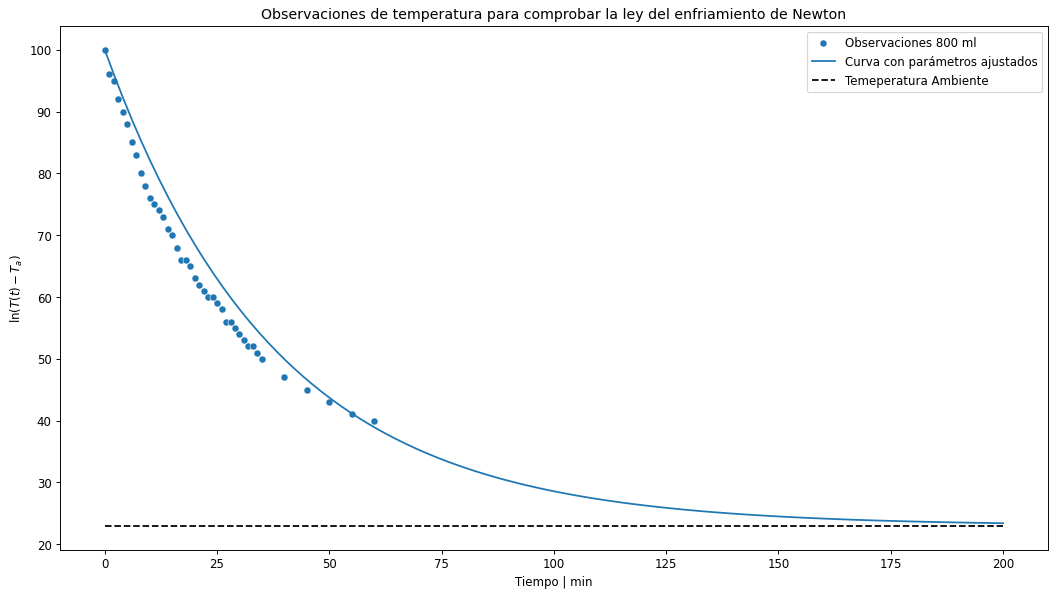

In [851]:
_time = np.linspace(0,200,100) # datos para suavizar la curva ajustada
_adjusted_data = T_a + (T_0 - T_a) * np.exp(W[1][0]*_time)

fig, ax = plt.subplots(1,1,figsize=(15,8),dpi=85)

ax = sbn.scatterplot(
    data = df,
    x = 'Time (min)',
    y = '800 ml Temperature °C',
    label = 'Observaciones 800 ml',
    ax=ax
)

ax = sbn.lineplot(
    x = _time,
    y = _adjusted_data,
    label = 'Curva con parámetros ajustados',
    ax=ax
)

ax.hlines(y=T_a,xmin=np.min(_time),xmax=np.max(_time),label = 'Temeperatura Ambiente',ls = '--',color = 'k')

ax.set_xlabel('Tiempo | min')
ax.set_ylabel(r'$\ln(T(t)-T_a)$')
ax.set_title('Observaciones de temperatura para comprobar la ley del enfriamiento de Newton')
ax.legend()
plt.show()

Según la interpolación deberíamos esperar cerca de 200 minutos para alcanza una temperatura cerca de la temperatura ambiente ¿Tiene eso sentido? 

$T_a$ es un punto de equilibrio del modelo, quiere decir que $T(t) \to T_a$ como $t \to \infty$, y solamente en el infinito alcanza la temperatura ambiente -lo cual, en la realidad, no es cierto-. 

# Un problema para ti

Toma los datos de las temperaturas para los vasos de precipitados de 100 y 300 ml. Calcula el valor para $k$ para cada conjunto de datos

Discute:
* ¿Tiene sentido que las $k$ difieran? ¿No deberían de ser los mismos valores de $k$ para todos los vasos?